Comparison of Parametric and Nonparametric Optimal Quantities:
Store: main street A
Parametric Optimal Quantity: 67.63196191771506
Nonparametric Optimal Quantity: 58.47

Store: main street B
Parametric Optimal Quantity: 99.08709876543212
Nonparametric Optimal Quantity: 117.16499999999999



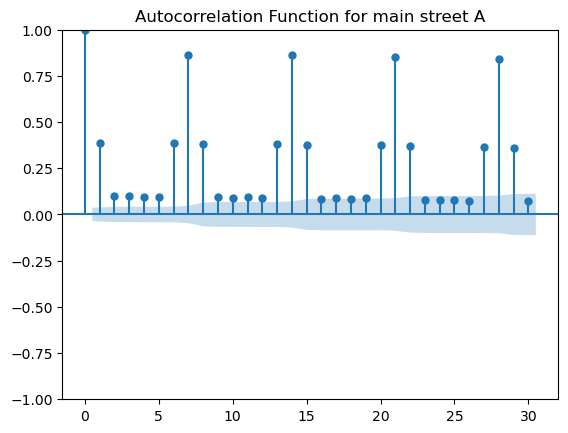

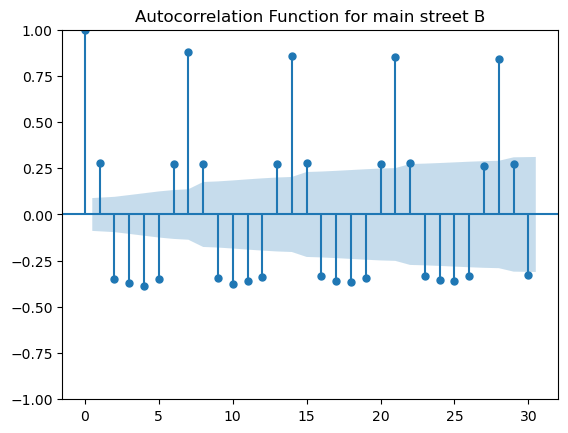

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf

# Load the dataset
data = pd.read_excel('C:\\Users\\tajes\\Downloads\\BakeryData2024_Vilnius.xlsx')

# Parametric approach
# Specify demand distribution parameters based on Task 5 results
parametric_means = data.select_dtypes(include=[np.number]).mean()
parametric_stds = data.select_dtypes(include=[np.number]).std()

# Select stores for analysis (e.g., main street A and main street B)
selected_stores = ['main street A', 'main street B']

# Estimate optimal quantities using parametric approach
optimal_parametric = {}
for store in selected_stores:
    mean = parametric_means[store]
    std = parametric_stds[store]
    # Assuming demand follows a normal distribution
    demand_dist = norm(loc=mean, scale=std)
    # Optimal quantity is the mean demand
    optimal_quantity = demand_dist.mean()
    optimal_parametric[store] = optimal_quantity

# Nonparametric approach
# Assuming no distributional assumptions, use historical data
optimal_nonparametric = {}
for store in selected_stores:
    # Optimal quantity is the median demand
    optimal_quantity = data[store].median()
    optimal_nonparametric[store] = optimal_quantity

# Comparison between parametric and nonparametric methods
print("Comparison of Parametric and Nonparametric Optimal Quantities:")
for store in selected_stores:
    print(f"Store: {store}")
    print(f"Parametric Optimal Quantity: {optimal_parametric[store]}")
    print(f"Nonparametric Optimal Quantity: {optimal_nonparametric[store]}")
    print()

# Plotting autocorrelation functions for each store's demand
for store in selected_stores:
    plot_acf(data[store].dropna(), lags=30, title=f'Autocorrelation Function for {store}')
    plt.show()
